In [4]:
%load_ext autoreload
%autoreload 2

In [115]:
import numpy as np
from zombies import d_zombie, zombie_human_behavior
from plotting_functions import basic_plot, behavior_plot
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


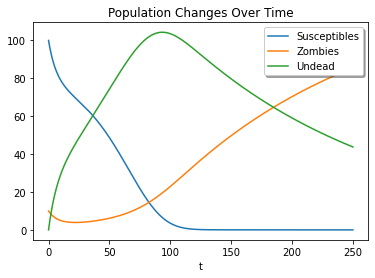

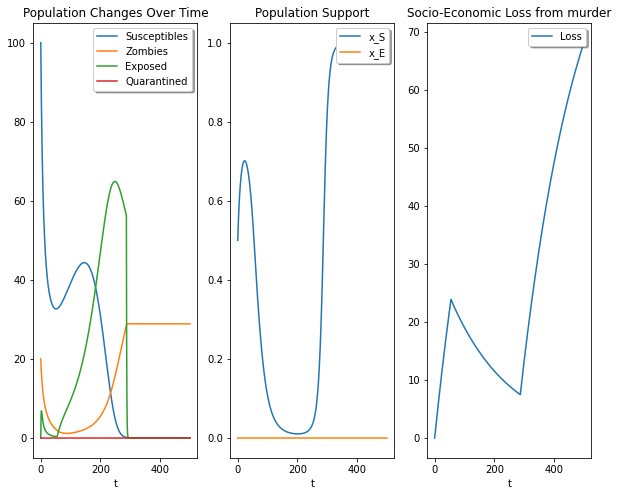

In [116]:
y_0 = np.array([100,10,0,0])

basic_params = [0.005, 0.0185, 0.0078, 0.006, 0.0001, 0.001]

solution = solve_ivp(
    d_zombie,
    (0, 250),
    y_0,
    first_step=0.05,
    max_step=0.05,
    args=basic_params
)
basic_plot(solution)

y_0 = [100, 20, 0, 0, 0, 0.5, 0, 0]

quarantine_params = [0, 1]

learning_params = [0.5, 0.0005, 0.005, .5, 0.005, 0.005]

params = basic_params + quarantine_params + learning_params
solution = solve_ivp(
    zombie_human_behavior,
    (0, 500),
    y_0,
    first_step=0.05,
    max_step=0.05,
    args=params
)

behavior_plot(solution)



In [40]:
print(solution.y.T[-1])

[6.39927785e-15 3.93101867e+01 3.50366913e-13 1.56101783e-11
 7.23050219e+01 3.15537712e-01 1.56442863e-01 0.00000000e+00]
